In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'new-york-city-airbnb-open-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F268833%2F611395%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240707%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240707T123520Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2b1d7e65747dcd755f07220607d8d5e9c9ccbdc0a8483fcbf35dd93092579c7bbd334f5ba8a10596f5f0802e5431e119f94ac5f3ff291b6cde72b9b81a1a67a2d01af18845aeb1c74dbb97facd1e0698c8eda4a3df81886bffbf5de4af5a7c63c710406f1e91757af6f3d6fa4991d28f9a44c812b6b0448110ebc1fa4853fa3c47656609b67f80d4dafc3f8681d6b65c0a65ecf82570a1a8950c77500410eda93714940ad07f3e1dd392b4252d3ed8406e4bba60f9ce660b99ce316cb96c542b178730e48e9e56add069ff65c8a392f8c7c0df5c652cceab426adc8d5b176a293b516a10aee31b74e085a7780b4a9345a939d73e5e46832738bf295282194757'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2562692 bytes downloaded
Downloaded and uncompressed: new-york-city-airbnb-open-data
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    if df[col].dtypes == "object":
        print(f"{col}: {df[col].unique()}")
        print(f"{col}: {df[col].value_counts()}")

name: ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'Cozy Entire Floor of Brownstone' ... 'Seas The Moment'
 '1B-1B apartment near by Metro' 'Cozy Private Room in Bushwick, Brooklyn']
name: name
Home away from home                        12
Loft Suite @ The Box House Hotel           11
Private Room                               10
Brooklyn Apartment                          9
New york Multi-unit building                8
                                           ..
1BR Avaliable in 3Br Condo                  1
UWS Duplex 3bdrm next to Central Pk         1
Spacious 4bdrm next to CentralPk            1
Luminous room                               1
Cozy Private Room in Bushwick, Brooklyn     1
Name: count, Length: 38253, dtype: int64
host_name: ['John' 'Jennifer' 'LisaRoxanne' ... 'Prince' 'David & Amy' 'Rusaa']
host_name: host_name
Michael           335
David             309
John              250
Alex              229
Sonder (NYC)      207
                 ... 
Krisztiá

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.price.describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

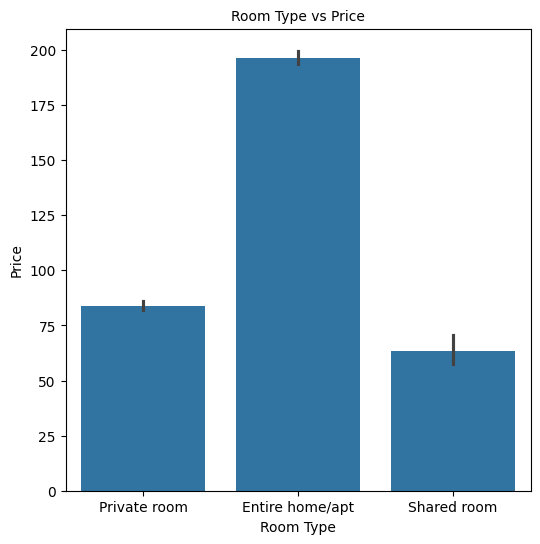

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.barplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price", size=10)

plt.show()

Text(0.5, 1.0, 'Neighbourhood Group vs Price')

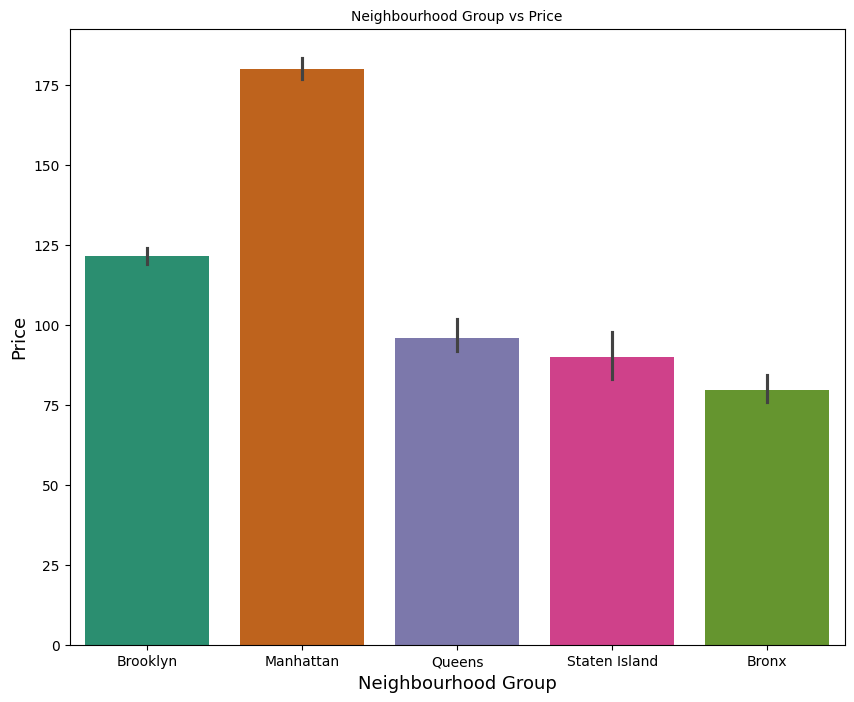

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette="Dark2")

plt.xlabel("Neighbourhood Group", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood Group vs Price",size=10)

Text(0.5, 1.0, 'Price vs Number of Reviews')

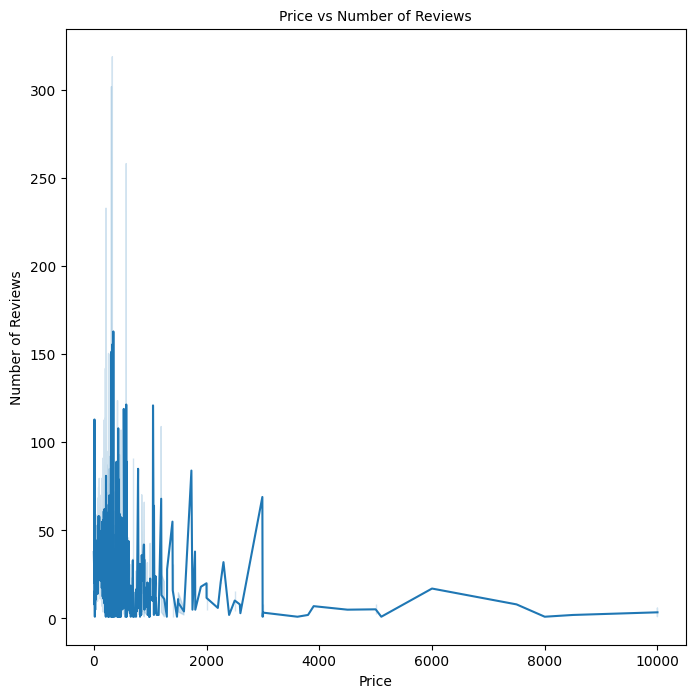

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='price', y='number_of_reviews' )

plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Price vs Number of Reviews",size=10)

In [ ]:
df = df.drop(columns=['name','id' ,'host_id','host_name','last_review'])

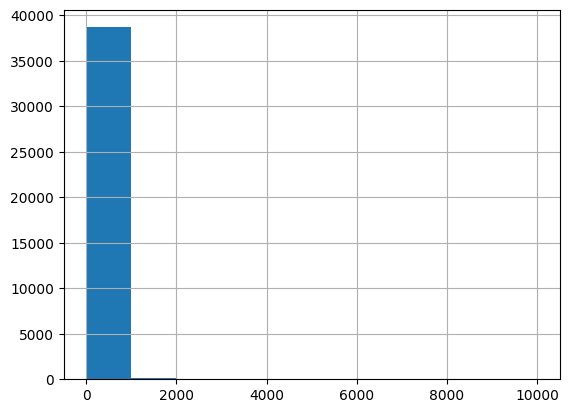

In [ ]:
hist_price = df["price"].hist()
plt.show()

In [ ]:
df = df[df["price"] < 1000]

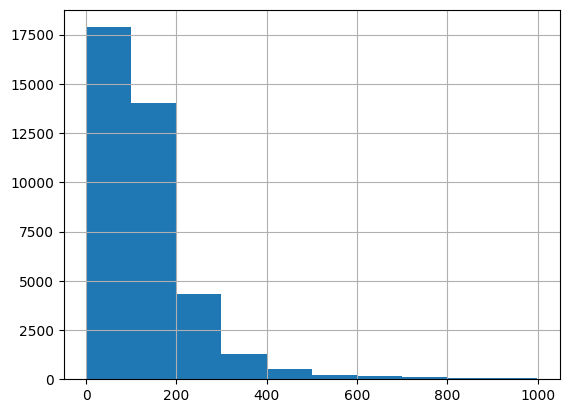

In [ ]:
hist_price = df["price"].hist() #after remove
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [ ]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,True,False,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,False,True,...,False,False,False,False,False,False,False,False,False,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,...,False,False,False,False,False,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,True,...,False,False,False,False,False,False,False,False,False,False
5,40.74767,-73.97500,200,3,74,0.59,1,129,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,129,1,1,1.00,1,147,False,True,...,False,False,False,False,False,False,False,False,True,False
48790,40.75104,-73.81459,45,1,1,1.00,6,339,False,False,...,False,False,False,False,False,False,False,False,True,False
48799,40.54179,-74.14275,235,1,1,1.00,1,87,False,False,...,False,False,False,False,False,False,False,False,True,False
48805,40.80787,-73.92400,100,1,2,2.00,1,40,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
df2 = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
y = df2['price']
x= df2.drop(['price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**model**

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            # Predict the output
            y_pred = self.predict(X)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(y_pred)

[0.20648408 0.13526684 0.14301822 ... 0.04642972 0.10340374 0.14119148]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.007780076070820886
Root Mean Squared Error (RMSE): 0.08820473950316324
Mean Absolute Error (MAE): 0.052550134889120276
R-squared Score: 0.30992812348460685
